<a href="https://colab.research.google.com/github/AkhileshMauryaa/Electrical_Vehical_MarketSegment_Analysis/blob/main/Market_Segments_Analysis_Cardekho_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# important liberties for Market Segement Analysis

In [ ]:
# Market segmentation libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data analysis libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/cardekho_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
df.tail()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [ ]:
df.shape

(15411, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [ ]:
df.dtypes

Unnamed: 0             int64
car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [ ]:
df.nunique()

Unnamed: 0           15411
car_name               121
brand                   32
model                  120
vehicle_age             24
km_driven             3688
seller_type              3
fuel_type                5
transmission_type        2
mileage                411
engine                 110
max_power              342
seats                    8
selling_price         1086
dtype: int64

In [ ]:
df.duplicated().sum()

0

#   Data Cleaning and Preprocessing

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.head(2)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197,82.0,5,550000


# 2. Exploratory Data Analysis (EDA)

In [ ]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


Vehicle Age Distribution:

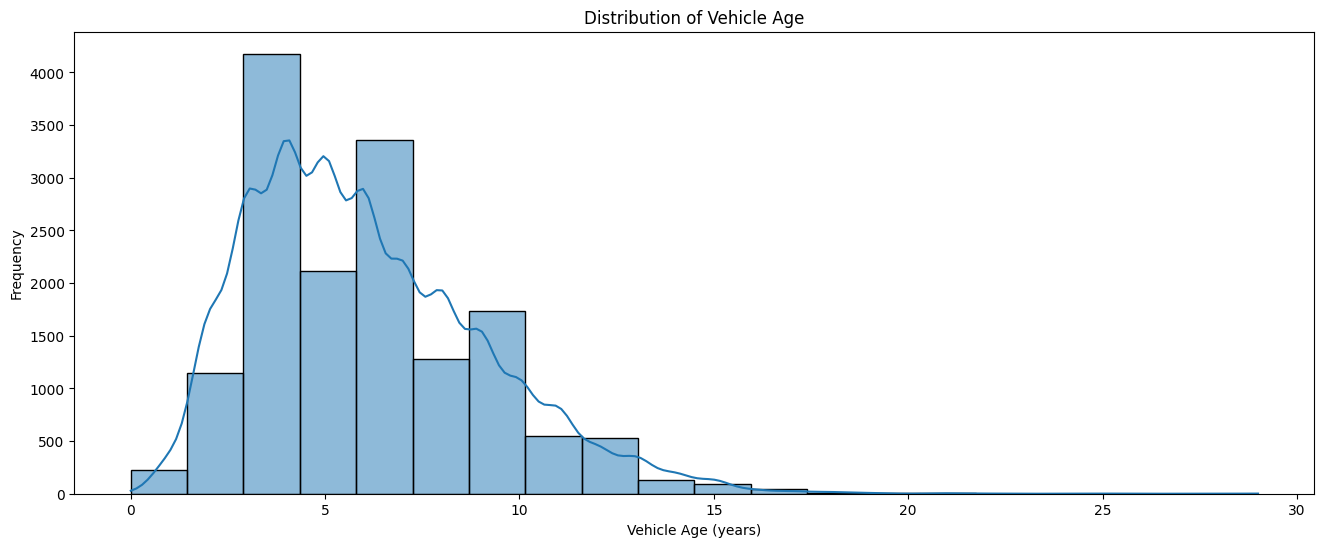

In [ ]:
plt.figure(figsize=(16, 6))
sns.histplot(df['vehicle_age'], bins=20, kde=True)
plt.title('Distribution of Vehicle Age')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Frequency')
plt.show()

Selling Price Distribution:

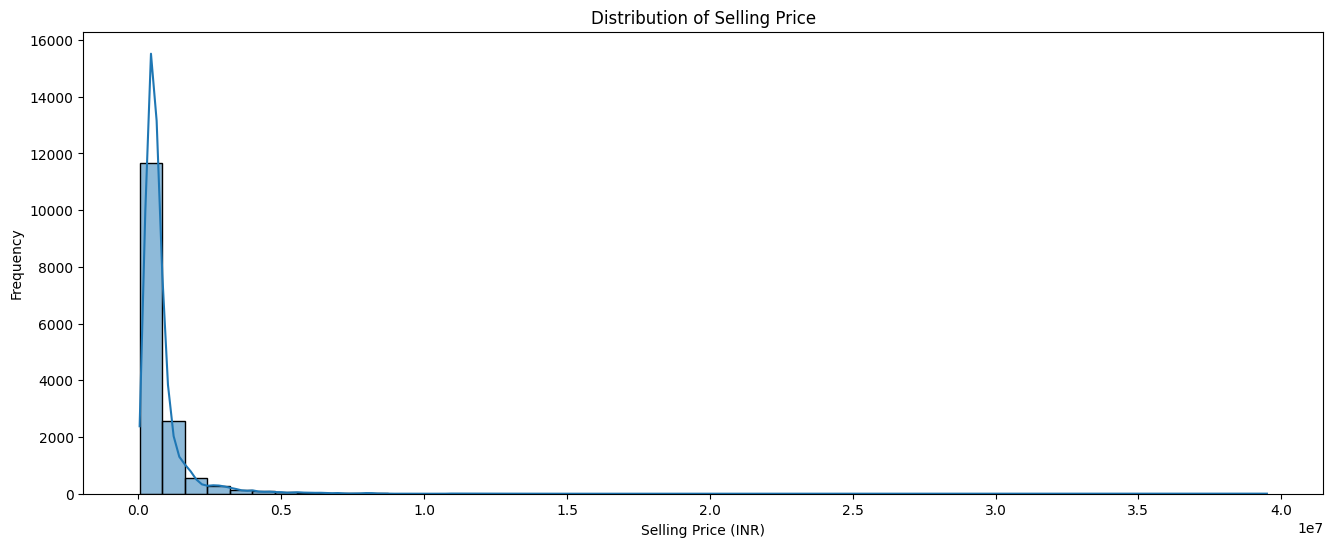

In [ ]:
plt.figure(figsize=(16, 6))
sns.histplot(df['selling_price'], bins=50, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (INR)')
plt.ylabel('Frequency')
plt.show()

Brand Distribution

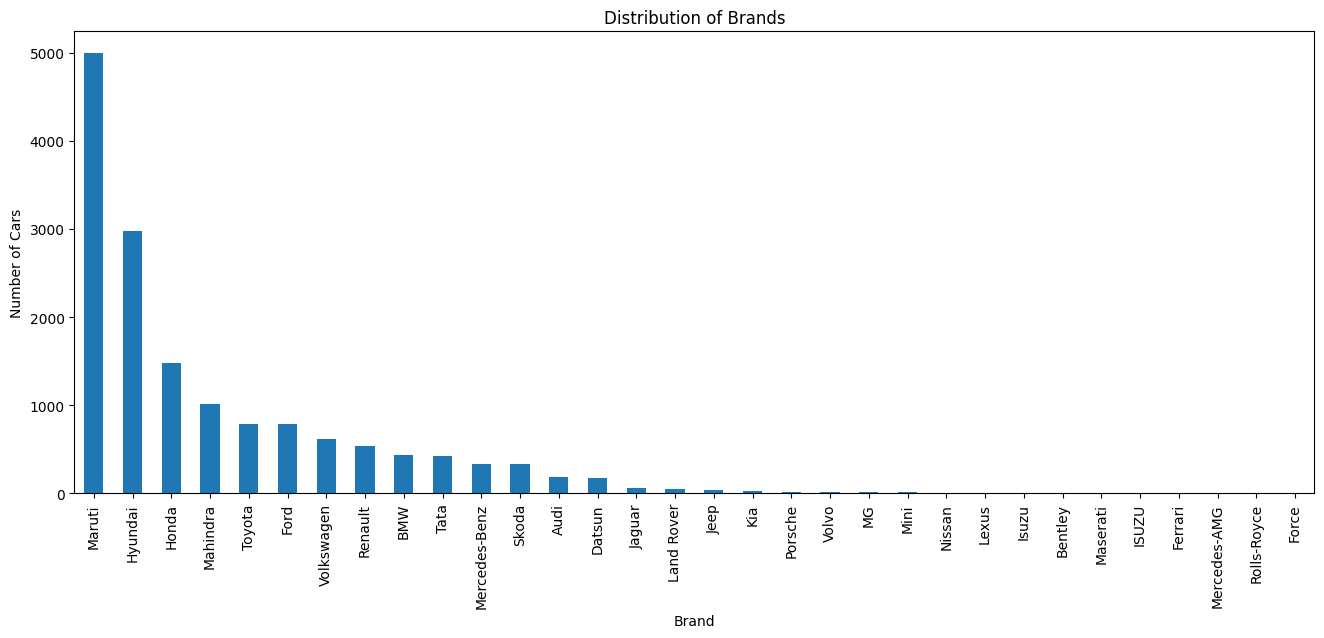

In [ ]:
plt.figure(figsize=(16, 6))
df['brand'].value_counts().plot(kind='bar')
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.show()

# Market Segmentation Analysis

Segmentation by Brand

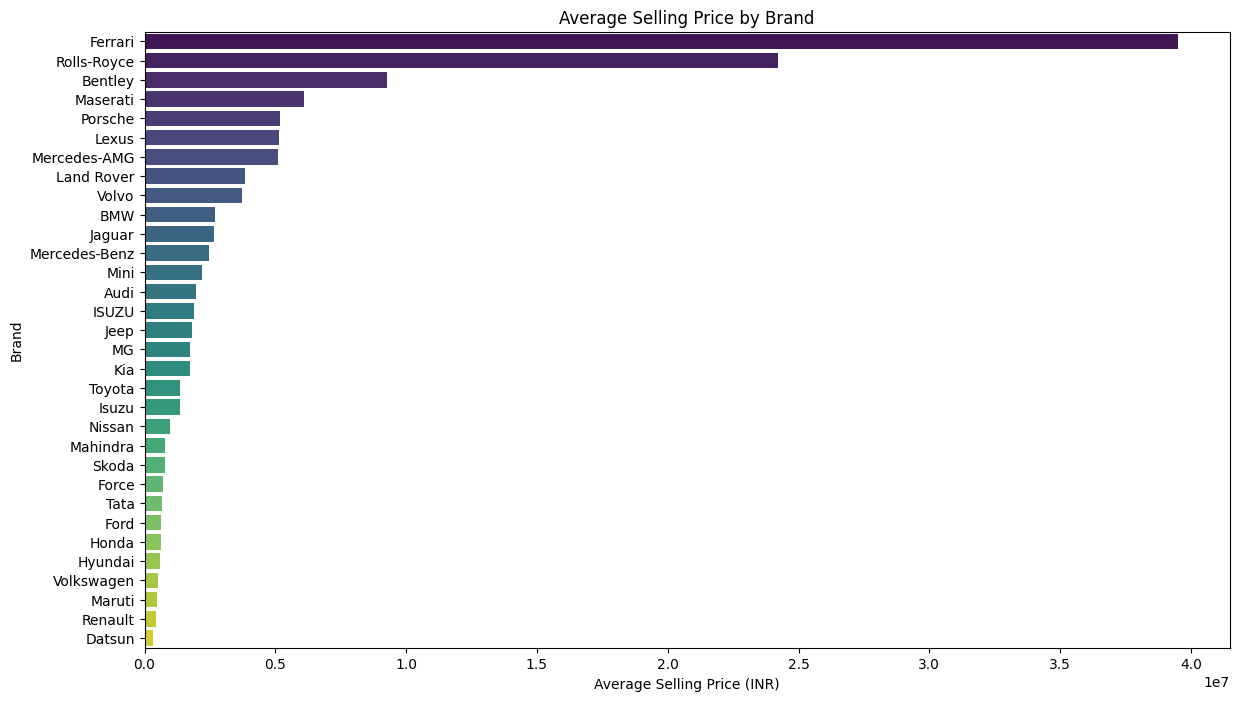

In [ ]:
import warnings
warnings.filterwarnings('ignore')
brand_avg_price = df.groupby('brand')['selling_price'].mean().reset_index().sort_values(by='selling_price', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(data=brand_avg_price, x='selling_price', y='brand', palette='viridis')
plt.title('Average Selling Price by Brand')
plt.xlabel('Average Selling Price (INR)')
plt.ylabel('Brand')
plt.show()

 Segmentation by Fuel Type

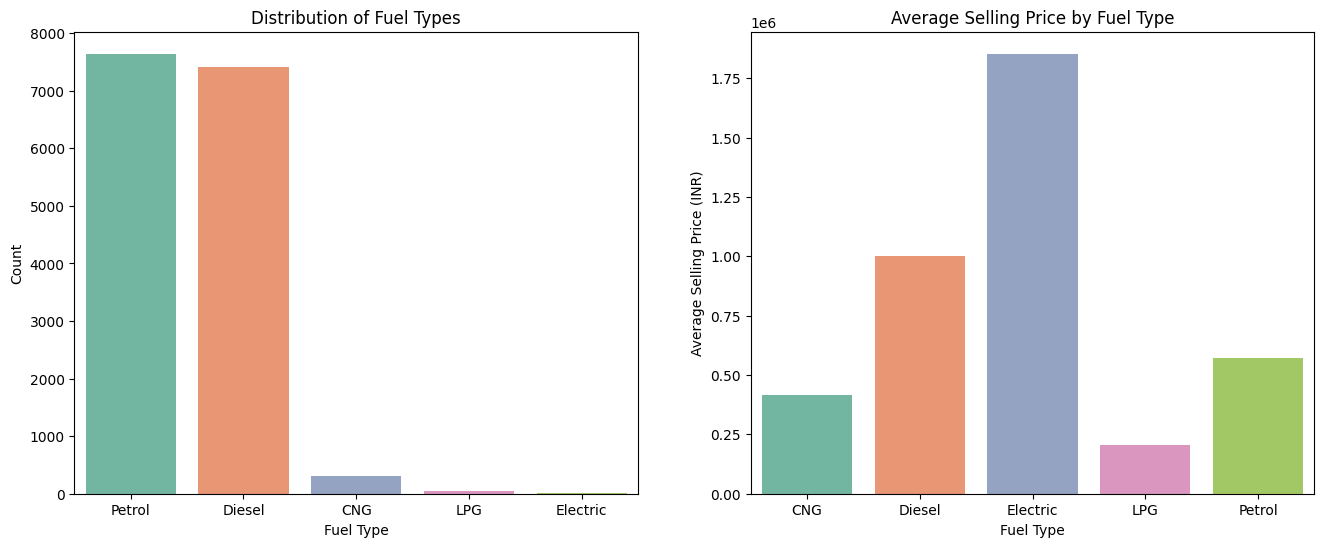

In [ ]:
fuel_type_counts = df['fuel_type'].value_counts()
fuel_type_avg_price = df.groupby('fuel_type')['selling_price'].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=fuel_type_counts.index, y=fuel_type_counts.values, ax=ax[0], palette='Set2')
ax[0].set_title('Distribution of Fuel Types')
ax[0].set_xlabel('Fuel Type')
ax[0].set_ylabel('Count')

sns.barplot(data=fuel_type_avg_price, x='fuel_type', y='selling_price', ax=ax[1], palette='Set2')
ax[1].set_title('Average Selling Price by Fuel Type')
ax[1].set_xlabel('Fuel Type')
ax[1].set_ylabel('Average Selling Price (INR)')

plt.show()


# Price Analysis Based on Vehicle Age and Mileage

Vehicle Age vs. Selling Price

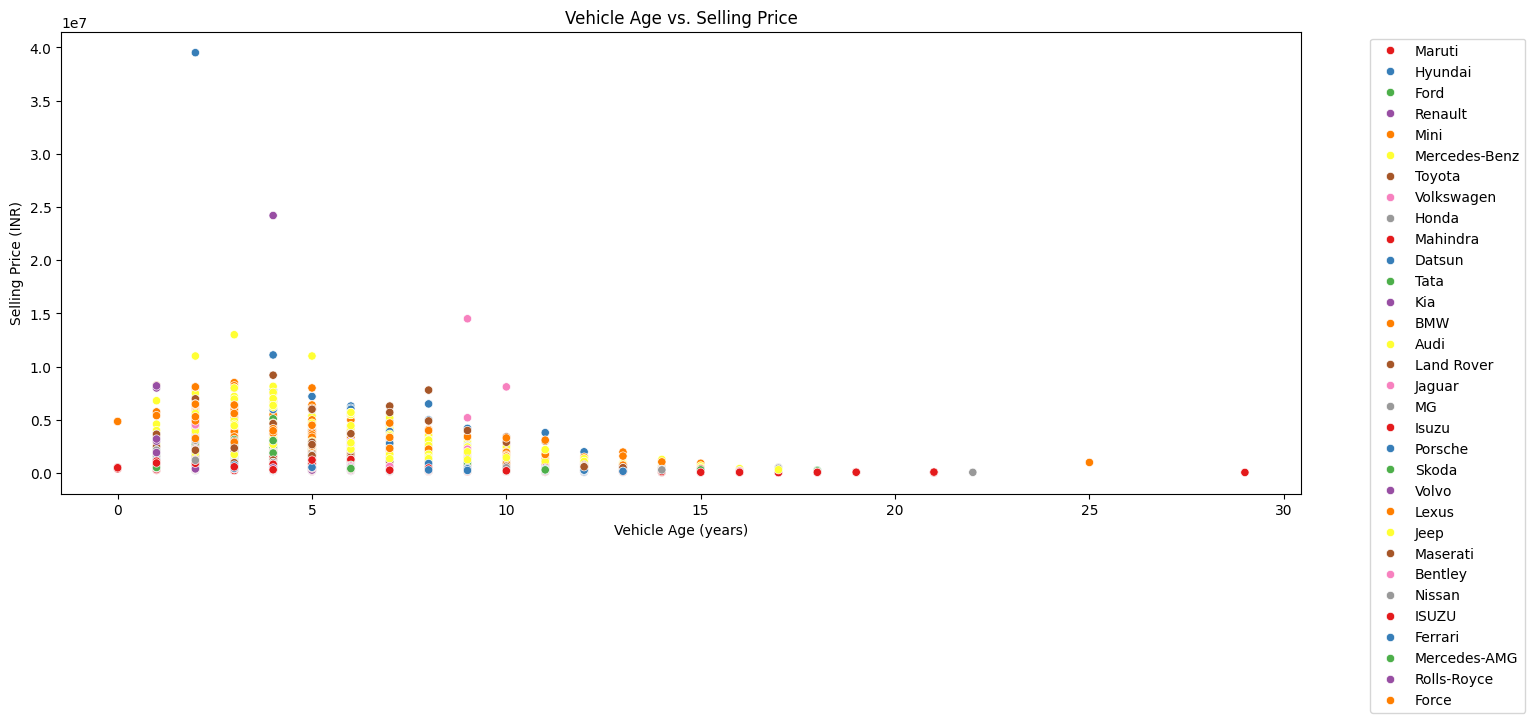

In [ ]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df, x='vehicle_age', y='selling_price', hue='brand', palette='Set1')
plt.title('Vehicle Age vs. Selling Price')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Selling Price (INR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Mileage vs. Selling Price

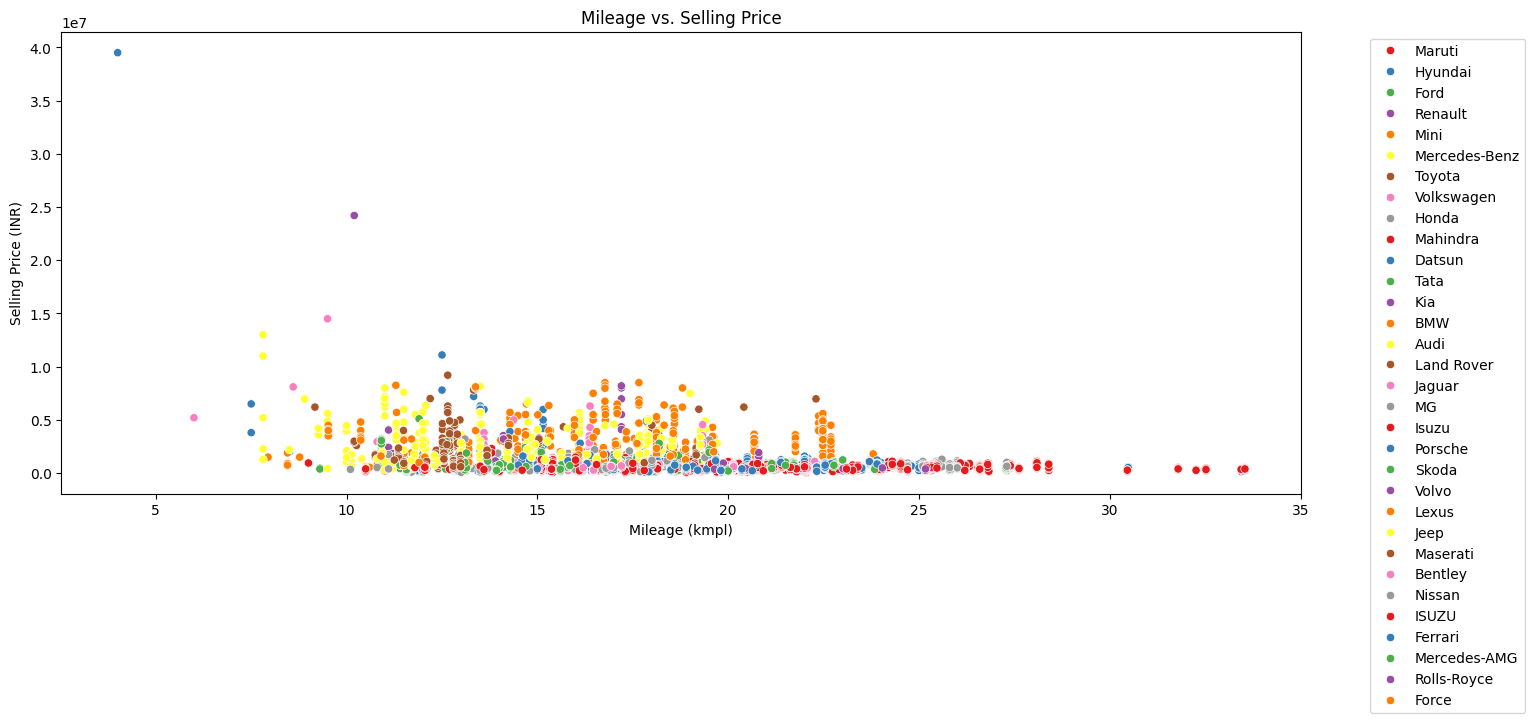

In [ ]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df, x='mileage', y='selling_price', hue='brand', palette='Set1')
plt.title('Mileage vs. Selling Price')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Selling Price (INR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

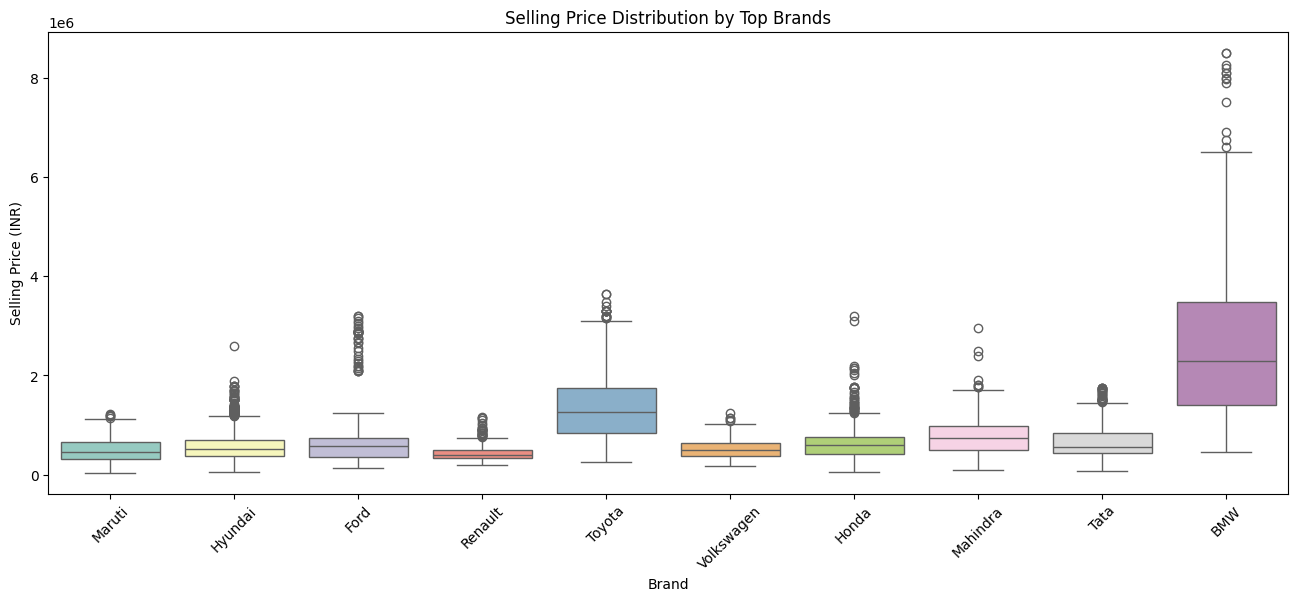

In [ ]:
top_brands = df['brand'].value_counts().head(10).index
top_brands_df = df[df['brand'].isin(top_brands)]

plt.figure(figsize=(16, 6))
sns.boxplot(data=top_brands_df, x='brand', y='selling_price', palette='Set3')
plt.title('Selling Price Distribution by Top Brands')
plt.xlabel('Brand')
plt.ylabel('Selling Price (INR)')
plt.xticks(rotation=45)
plt.show()

# checking Outliers

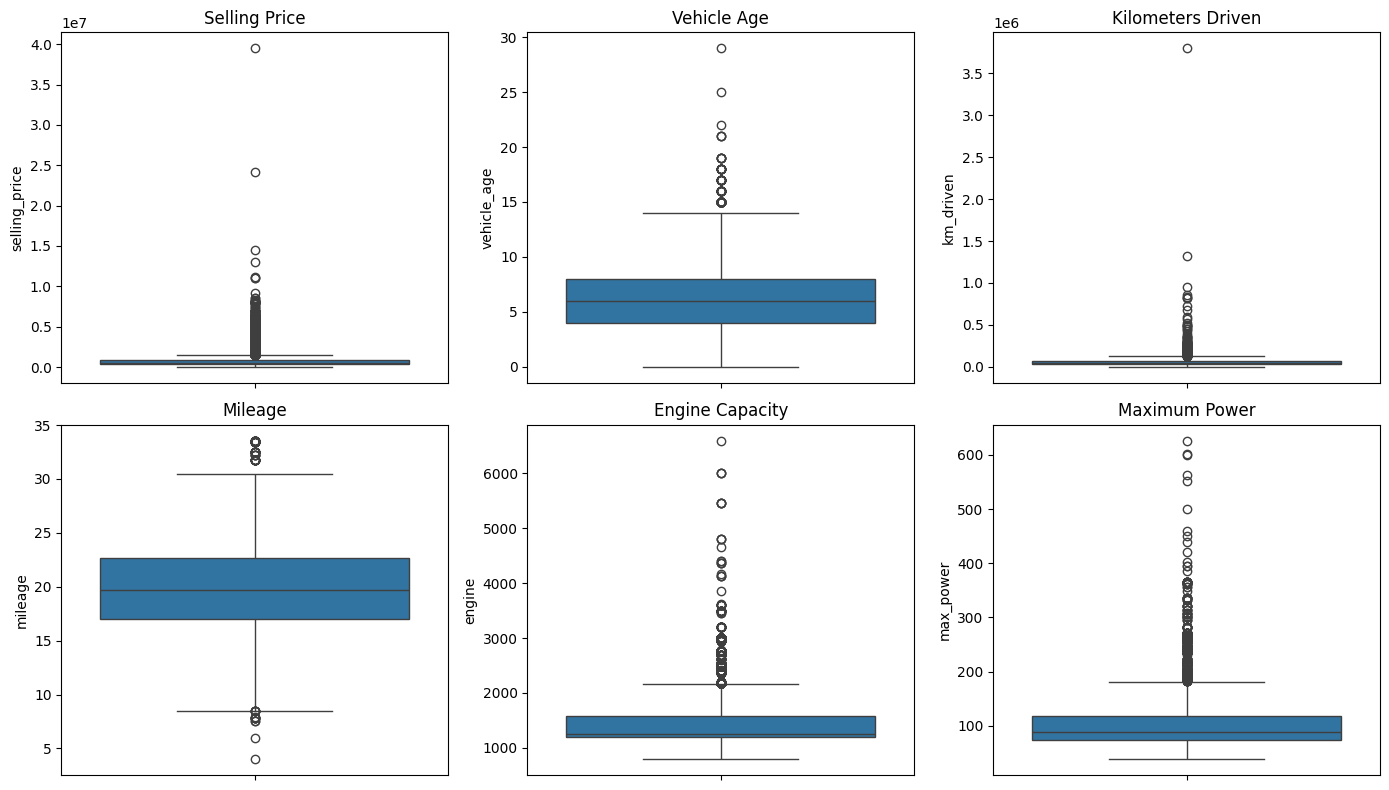

In [ ]:
# Box plots for key variables to identify outliers
plt.figure(figsize=(14, 8))

# Selling Price
plt.subplot(2, 3, 1)
sns.boxplot(y=df['selling_price'])
plt.title('Selling Price')

# Vehicle Age
plt.subplot(2, 3, 2)
sns.boxplot(y=df['vehicle_age'])
plt.title('Vehicle Age')

# Kilometers Driven
plt.subplot(2, 3, 3)
sns.boxplot(y=df['km_driven'])
plt.title('Kilometers Driven')

# Mileage
plt.subplot(2, 3, 4)
sns.boxplot(y=df['mileage'])
plt.title('Mileage')

# Engine Capacity
plt.subplot(2, 3, 5)
sns.boxplot(y=df['engine'])
plt.title('Engine Capacity')

# Maximum Power
plt.subplot(2, 3, 6)
sns.boxplot(y=df['max_power'])
plt.title('Maximum Power')

plt.tight_layout()
plt.show()


# removing outliers

In [ ]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where(series < lower_bound, lower_bound, np.where(series > upper_bound, upper_bound, series))

# Cap outliers for specified columns
columns_to_cap = ['selling_price', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power']
for column in columns_to_cap:
    df[column] = cap_outliers(df[column])

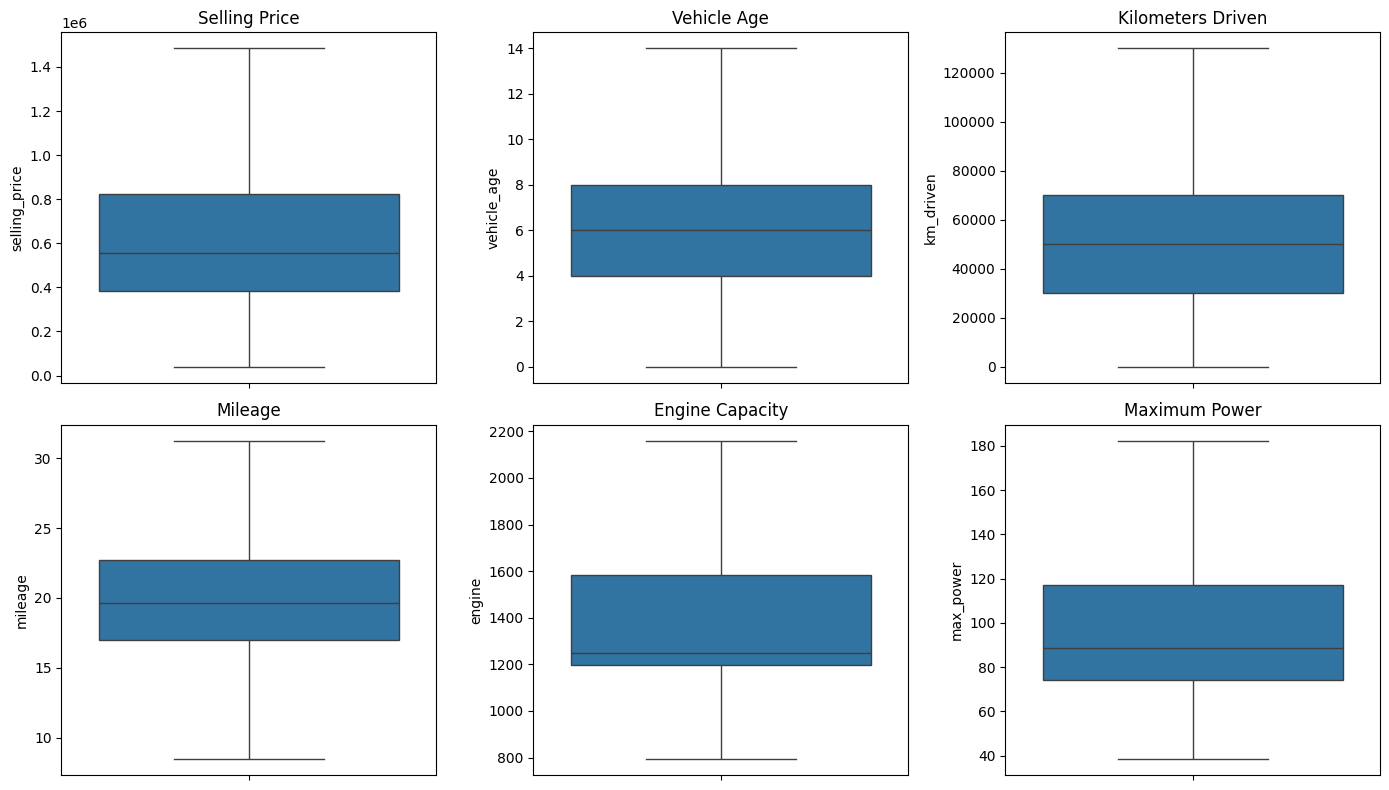

In [ ]:
# Box plots for key variables to identify outliers
plt.figure(figsize=(14, 8))

# Selling Price
plt.subplot(2, 3, 1)
sns.boxplot(y=df['selling_price'])
plt.title('Selling Price')

# Vehicle Age
plt.subplot(2, 3, 2)
sns.boxplot(y=df['vehicle_age'])
plt.title('Vehicle Age')

# Kilometers Driven
plt.subplot(2, 3, 3)
sns.boxplot(y=df['km_driven'])
plt.title('Kilometers Driven')

# Mileage
plt.subplot(2, 3, 4)
sns.boxplot(y=df['mileage'])
plt.title('Mileage')

# Engine Capacity
plt.subplot(2, 3, 5)
sns.boxplot(y=df['engine'])
plt.title('Engine Capacity')

# Maximum Power
plt.subplot(2, 3, 6)
sns.boxplot(y=df['max_power'])
plt.title('Maximum Power')

plt.tight_layout()
plt.show()


# Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numerical_features = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']
categorical_features = ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [ ]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ])

# Fit and transform the data
df_preprocessed = preprocessor.fit_transform(df)

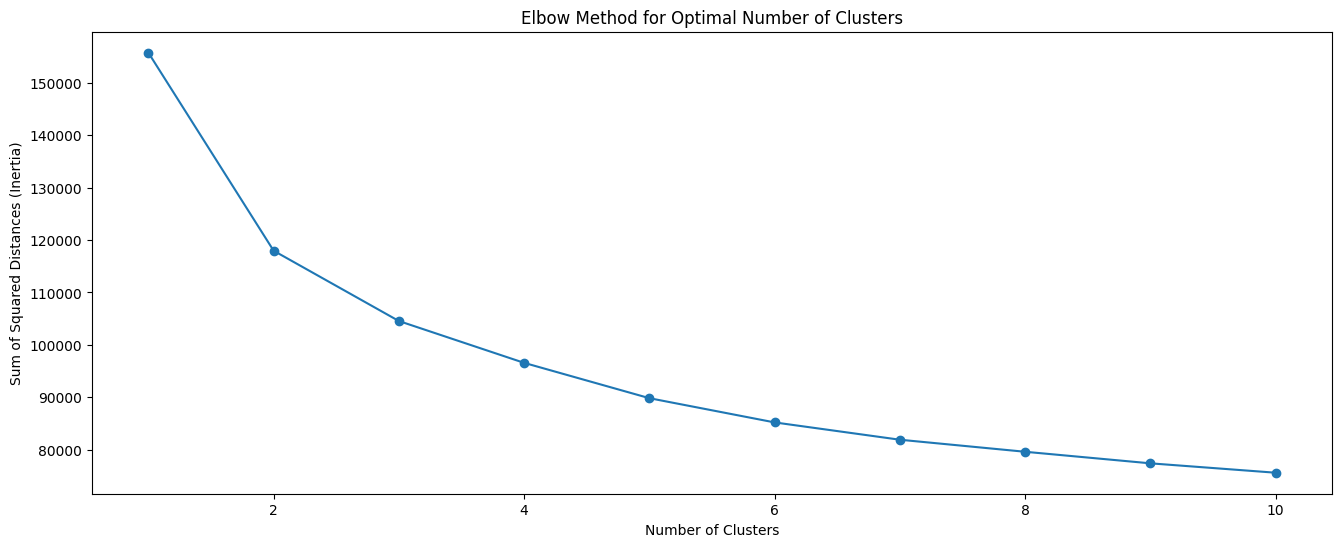

In [ ]:
# Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_preprocessed)
    sse.append(kmeans.inertia_)

# Plot the Elbow method results
plt.figure(figsize=(16, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

In [ ]:
optimal_clusters = 4  # You may adjust this based on the elbow plot

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_preprocessed)

In [ ]:
# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(df_pca)

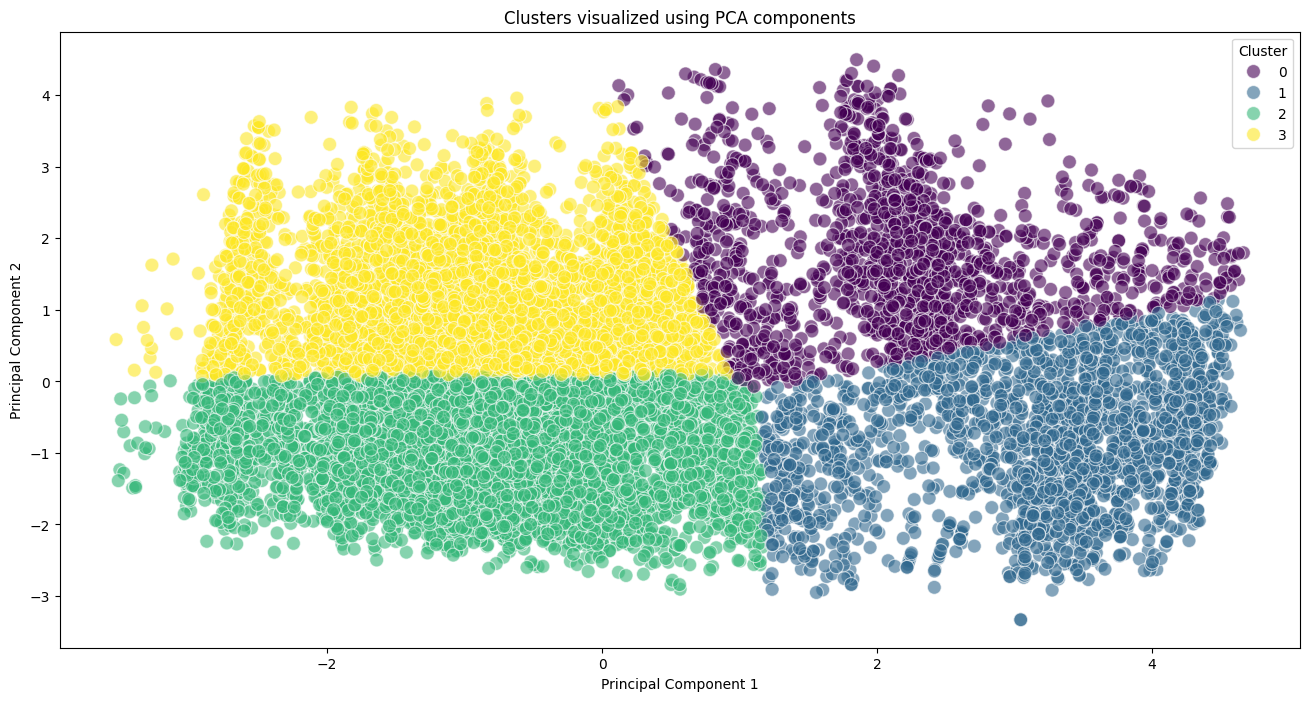

In [ ]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['cluster'], palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('Clusters visualized using PCA components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()